## Assignment

In marketing competitor analysis, you assess the strengths and weaknesses of your rivals. You try to figure out what situations may provide an opportunity for them. Find situations which are likely to become a threat for them as well. A marketing competitor analysis is a critical part of your own marketing strategy.

Assume you are a marketing analyst of a major electronics retailer. You are researching your company’s e-commerce competitors and want to group the competitors based on their performance data. You have compiled a data set that contains the following four performance measures of the major competitors’ e-commerce operations: Annual Revenue (Revenue, in $), Growth Rate (in %), Monthly Visits (Visits), and Conversion Rate (in %). In order to avoid any personal bias in grouping these competitors, you replaced the names of the competitors with a code.

Please answer the following questions by using all four performance measures: 

1. Does the data set need to be standardized prior to cluster analysis? 
2. Apply k-mean clustering and identify the number of clusters using the elbow method. 
3. What are the size and cluster center values of the largest cluster of competitors?

In [1]:
# load data
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/franklin-univ-data-science/data/master/competitors.csv")
df.head()

,Web Site,Revenue,Growth Rate,Visits,Conversion Rate
0,1,3276000.0,13.600,78047136,1.928
1,2,2485716.0,9.600,28000000,4.000
2,3,2432000.0,14.264,19161819,3.760
3,4,2286894.4,2.400,8960000,5.960
4,5,2173701.6,8.000,3600000,4.640


### Instructor Solutions

1. The data set needs standardization as the scales between input variables are very different.

In [2]:
# load data
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/franklin-univ-data-science/data/master/competitors.csv")
df.head()

,Web Site,Revenue,Growth Rate,Visits,Conversion Rate
0,1,3276000.0,13.600,78047136,1.928
1,2,2485716.0,9.600,28000000,4.000
2,3,2432000.0,14.264,19161819,3.760
3,4,2286894.4,2.400,8960000,5.960
4,5,2173701.6,8.000,3600000,4.640


In [3]:
from sklearn.preprocessing import StandardScaler

# creat an instance of StandardScaler; then we can call its function
stdsc = StandardScaler()

# call the fit_transform() to standardize the annual income and spending score.
df[["Revenue", "Growth Rate", "Visits", "Conversion Rate"]] = stdsc.fit_transform(df[["Revenue", "Growth Rate", "Visits", "Conversion Rate"]])
df.head()

,Web Site,Revenue,Growth Rate,Visits,Conversion Rate
0,1,-0.662476,0.081396,2.992001,-0.681336
1,2,-0.665372,-0.336555,0.394243,0.634960
2,3,-0.665568,0.150776,-0.064513,0.482494
3,4,-0.666100,-1.088867,-0.594051,1.880105
4,5,-0.666515,-0.503735,-0.872268,1.041538


C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

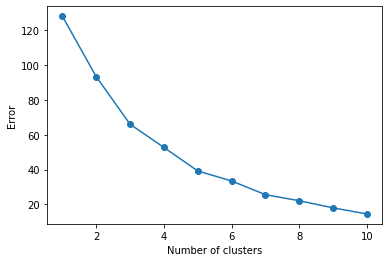

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

error = []
for i in range(1, 11): # here we test the cluster number from 1 to 10
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(df[["Revenue", "Growth Rate", "Visits", "Conversion Rate"]])
    error.append(km.inertia_)

# The plot() function in pyplot module of matplotlib library is used to make a 2D plot of points x, y.
plt.plot(range(1, 11), error, marker='o') # plt.plot() is 
plt.xlabel('Number of clusters') # define the x-axis label
plt.ylabel('Error') # define the y-axis label
plt.show()

In [5]:
km = KMeans(n_clusters=4, random_state=1)

y_km = km.fit_predict(df[["Revenue", "Growth Rate", "Visits", "Conversion Rate"]])

df["clusters"] = y_km

df.head()

C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Web Site,Revenue,Growth Rate,Visits,Conversion Rate,clusters
0,1,-0.662476,0.081396,2.992001,-0.681336,3
1,2,-0.665372,-0.336555,0.394243,0.634960,0
2,3,-0.665568,0.150776,-0.064513,0.482494,0
3,4,-0.666100,-1.088867,-0.594051,1.880105,0
4,5,-0.666515,-0.503735,-0.872268,1.041538,0


In [6]:
df["clusters"].value_counts()

0    19
1     6
2     5
3     2
Name: clusters, dtype: int64

The class 0 with 19 customers is the largest.


In [10]:
# the cluster centers:
km.cluster_centers_

array([[-0.66895573, -0.2241042 , -0.11958888, -0.09901976],
       [ 1.0392248 ,  1.37091397, -0.42306276,  0.53331579],
       [ 1.56108678, -1.0320254 , -0.34798852,  0.25379352],
       [-0.66531192,  0.59631153,  3.27525396, -1.29374343]])

In [11]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

# convert centers to the original scales and safe results in dataframe
centers = pd.DataFrame(stdsc.inverse_transform(km.cluster_centers_))
centers.columns = ["Revenue", "Growth Rate", "Visits", "Conversion Rate"]
centers

,Revenue,Growth Rate,Visits,Conversion Rate
0,1507555,11,18100755,3
1,467693760,26,12254174,4
2,610117147,3,13700518,3
3,2502000,19,83504153,1


The largest cluster's centers:


In [9]:
centers.iloc[0]

Revenue            1507555
Growth Rate             11
Visits            18100755
Conversion Rate          3
Name: 0, dtype: float64